In [38]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import lines
import matplotlib.cm as cm
import tqdm
from tqdm.notebook import tqdm as tqdm

import model_opt
import data_generate
import algo_GD



In [54]:
_t_max =1000
_cmap = plt.cm.jet
w_init = [10,10]
loss_transition = []
f_store=[]
f = model_opt.Bohachevsky(err = 2)
algo = algo_GD.SGD(w_init=w_init,t_max=_t_max,a=0.03)

In [55]:
# updateを行うたびに異なるノイズが加えられる
for i in tqdm(algo):
    loss_transition.append(np.sum((f.w_star - algo.w) ** 2))
    f_store.append(f.f_opt(algo.w))
    algo.update(model=f)
    
    


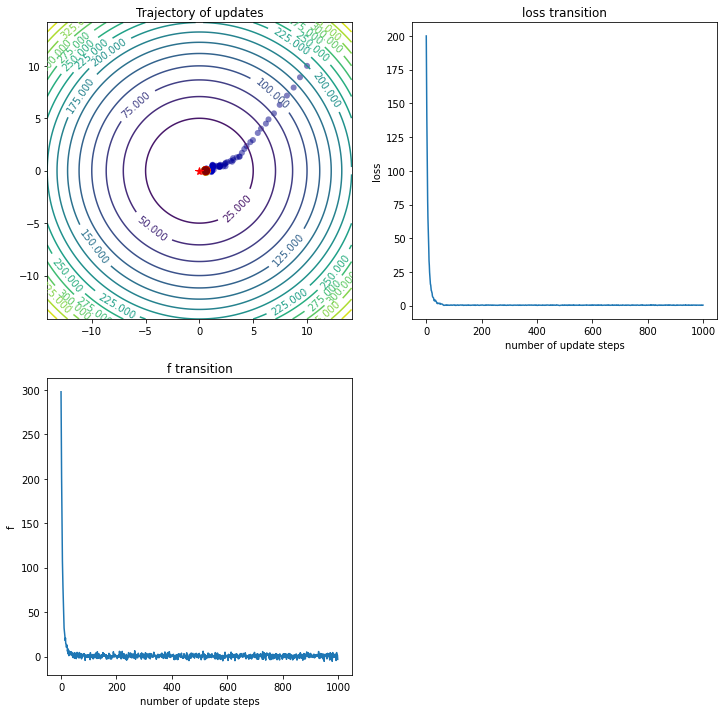

In [56]:
w_store = np.array(algo.wstore)
# 目的関数の真の値
w_star = f.w_star

# 等高線描画用
def circle(x, y,w):
    return (x-w) ** 2 + (y-w) ** 2

# wの軌跡
tmpdel = np.linalg.norm(w_star-w_init)
xvals = np.arange(w_star[0]-tmpdel, w_star[0]+tmpdel, 0.01)
yvals = np.arange(w_star[1]-tmpdel, w_star[1]+tmpdel, 0.01)
x1, x2 = np.meshgrid(xvals, yvals)
Z = circle(x1, x2,w_star[0])
myfig = plt.figure(figsize=(12,12))

ax1 = myfig.add_subplot(2,2,1)
plt.title("Trajectory of updates")
CS = ax1.contour(x1, x2, Z, levels=15)
c = np.linspace(0, _t_max, len(w_store))
ax1.scatter(w_store.T[0],w_store.T[1],c=c,cmap = _cmap,linewidths=0.01,alpha=0.5)
ax1.plot(*w_star, 'r*', markersize=8)
CS.clabel(inline=1, fontsize=10)


# 真の値とtステップ目のwとの２乗誤差の推移
ax2 = myfig.add_subplot(2,2,2)
plt.title("loss transition")
plt.xlabel('number of update steps')
plt.ylabel('loss')
ax2.plot(list(range(_t_max)),loss_transition)

# 関数値の推移
ax2 = myfig.add_subplot(2,2,3)
plt.title("f transition")
plt.xlabel('number of update steps')
plt.ylabel('f')
ax2.plot(list(range(_t_max)),f_store)

In [57]:
_t_max =1000
_cmap = plt.cm.jet
w_init = [-2,2]
loss_transition = []
f_store=[]

f = model_opt.Perm(err = 5,b=0.0000001)
algo = algo_GD.SGD(w_init=w_init,t_max=_t_max,a=0.003)

In [58]:
for i in tqdm(algo):
    loss_transition.append(np.sum((f.w_star - algo.w) ** 2))
    f_store.append(f.f_opt(algo.w))
    algo.update(model=f)
    

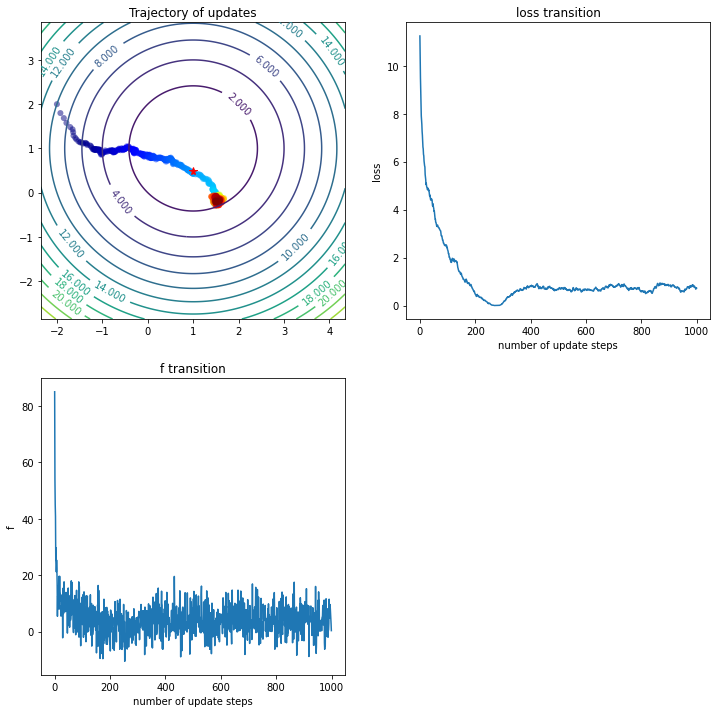

In [59]:
w_store = np.array(algo.wstore)
# 目的関数の真の値
w_star = f.w_star

# 等高線描画用
def circle(x, y,w):
    return (x-w) ** 2 + (y-w) ** 2

# wの軌跡
tmpdel = np.linalg.norm(w_star-w_init)
xvals = np.arange(w_star[0]-tmpdel, w_star[0]+tmpdel, 0.01)
yvals = np.arange(w_star[1]-tmpdel, w_star[1]+tmpdel, 0.01)
x1, x2 = np.meshgrid(xvals, yvals)
Z = circle(x1, x2,w_star[0])
myfig = plt.figure(figsize=(12,12))

ax1 = myfig.add_subplot(2,2,1)
plt.title("Trajectory of updates")
CS = ax1.contour(x1, x2, Z, levels=15)
c = np.linspace(0, _t_max, len(w_store))
ax1.scatter(w_store.T[0],w_store.T[1],c=c,cmap = _cmap,linewidths=0.01,alpha=0.5)
ax1.plot(*w_star, 'r*', markersize=8)
CS.clabel(inline=1, fontsize=10)


# 真の値とtステップ目のwとの２乗誤差の推移
ax2 = myfig.add_subplot(2,2,2)
plt.title("loss transition")
plt.xlabel('number of update steps')
plt.ylabel('loss')
ax2.plot(list(range(_t_max)),loss_transition)

# 関数値の推移
ax2 = myfig.add_subplot(2,2,3)
plt.title("f transition")
plt.xlabel('number of update steps')
plt.ylabel('f')
ax2.plot(list(range(_t_max)),f_store)

In [45]:
algo.w

array([ 1.53484801, -0.19516514])

In [46]:
w

NameError: name 'w' is not defined